<a href="https://colab.research.google.com/github/Davydmunoz0/Boston_Housing_Pratica/blob/main/boston_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar dataset Boston Housing pelo OpenML
data = fetch_openml(name='boston', version=1, as_frame=True)
df = data.frame

# Renomear a variável alvo para 'Preco'
df.rename(columns={'MEDV': 'Preco'}, inplace=True)

# Exibir as primeiras linhas do dataset
print(df.head())

# Informações básicas
print("\nInformações do Dataset:")
print(df.info())

# Estatísticas Descritivas
print("\nEstatísticas Descritivas:")
print(df.describe())


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  Preco  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category

In [2]:
#Entender a estrutura dos dados
df.describe()
df.info()  # Verificar tipos de dados e valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Preco    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


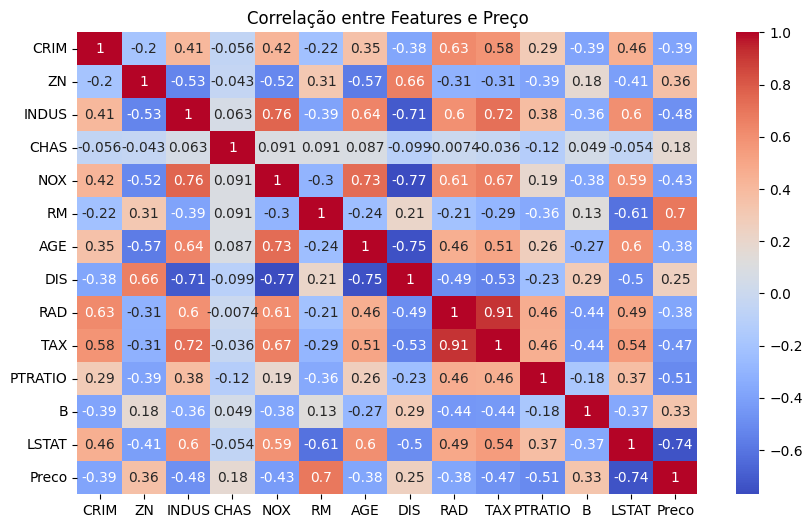

In [3]:
#Visualizar correlações
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Features e Preço')
plt.show()

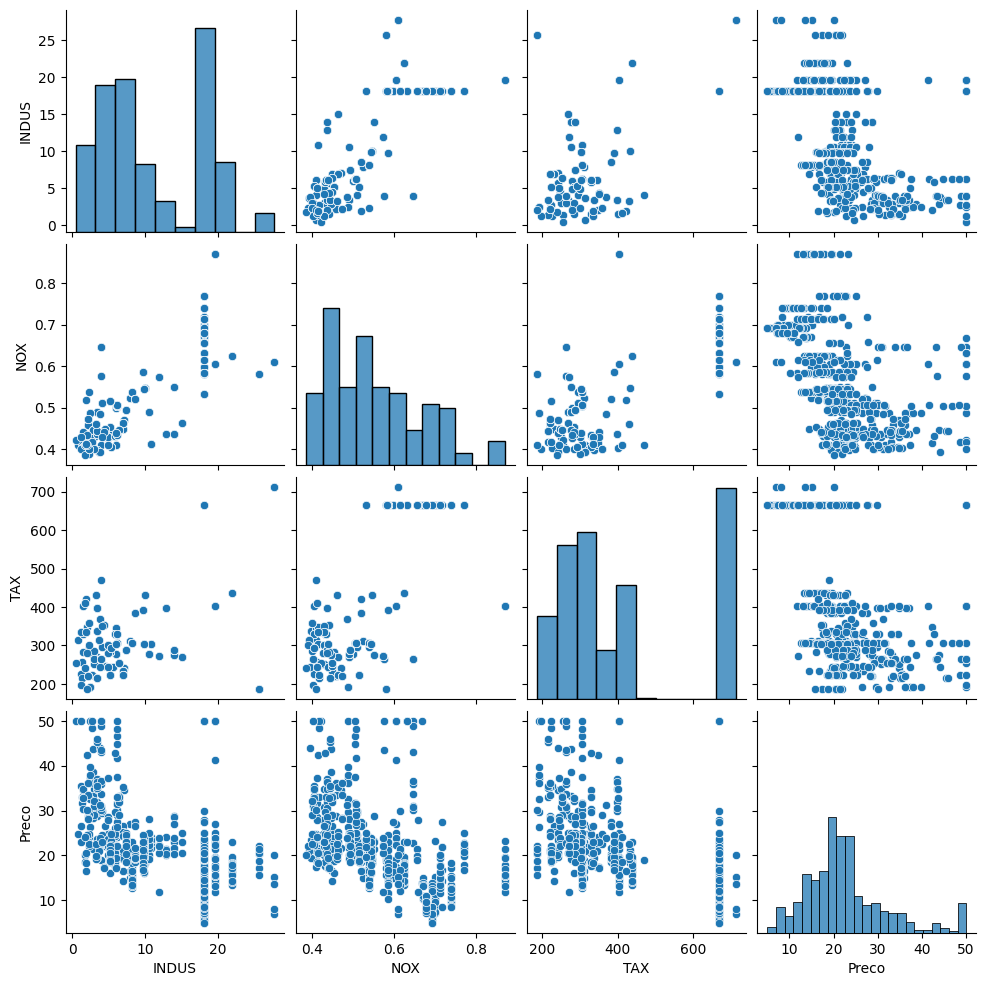

In [4]:
#Plotar distribuições
sns.pairplot(df[['INDUS','NOX', 'RAD', 'TAX', 'Preco']])
plt.show()

In [5]:
#Tratar outliers
# Exemplo: Remover registros com "AveRooms" > 20
df = df[df['TAX'] <= 500]
df = df[df['NOX'] <= 0.7]

In [6]:
#Dividir dataset em treino e teste
X = df.drop('Preco', axis=1)
y = df['Preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#Normalizar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#Modelo 1: Regressão Linear
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [9]:
#Modelo 2: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [10]:
#Modelo 3: XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

In [11]:
#Avaliação dos Modelos
#Calcular Métricas:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name}:')
    print(f'MSE: {mse:.2f}')
    print(f'R²: {r2:.2f}\n')

evaluate_model(y_test, y_pred_lr, 'Regressão Linear')
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_xgb, 'XGBoost')

Regressão Linear:
MSE: 9.06
R²: 0.87

Random Forest:
MSE: 6.39
R²: 0.91

XGBoost:
MSE: 7.46
R²: 0.90



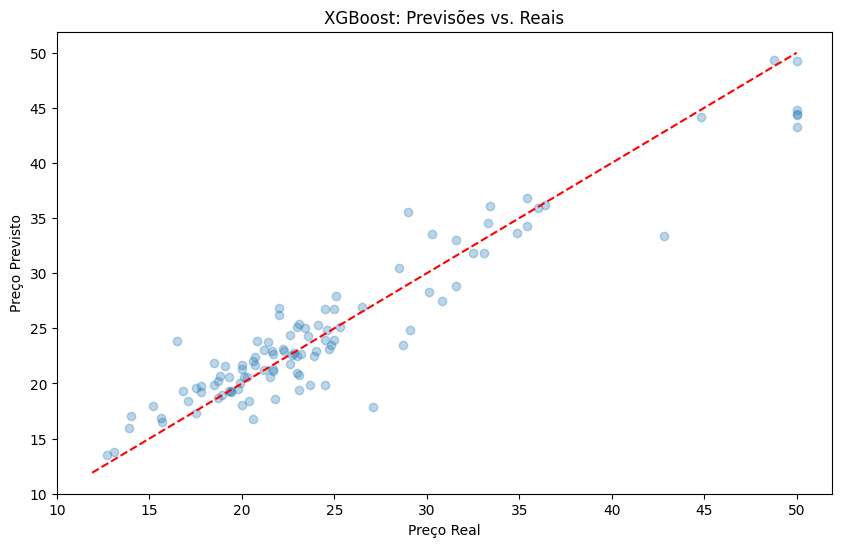

In [12]:
#Interpretação e Visualização
#Comparar previsões vs. valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('XGBoost: Previsões vs. Reais')
plt.show()

Importâncias - Random Forest: [1.04923314e-02 1.57706160e-03 6.89190515e-03 5.40547744e-04
 5.36676231e-03 8.44022820e-01 2.17514137e-02 9.33902847e-03
 5.08373585e-03 1.71874905e-02 2.93201743e-02 9.04018097e-03
 3.93865480e-02]
Importâncias - XGBoost: [0.00419925 0.00609434 0.0147412  0.00652409 0.01442719 0.75779396
 0.01572587 0.0135334  0.01977585 0.03731479 0.06454041 0.00580949
 0.03952028]
Importância das Features - Random Forest


<ipython-input-13-aa2b499ea777>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")


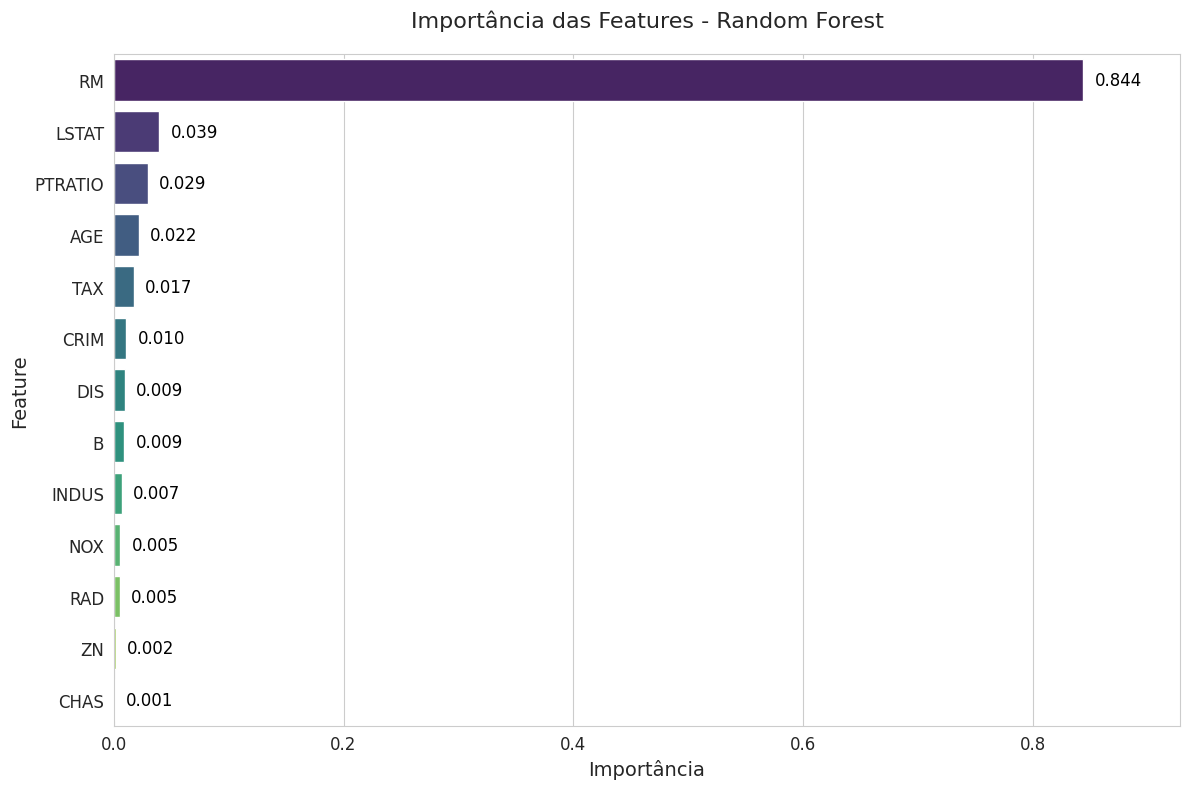

Importância das Features - XGBoost


<ipython-input-13-aa2b499ea777>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")


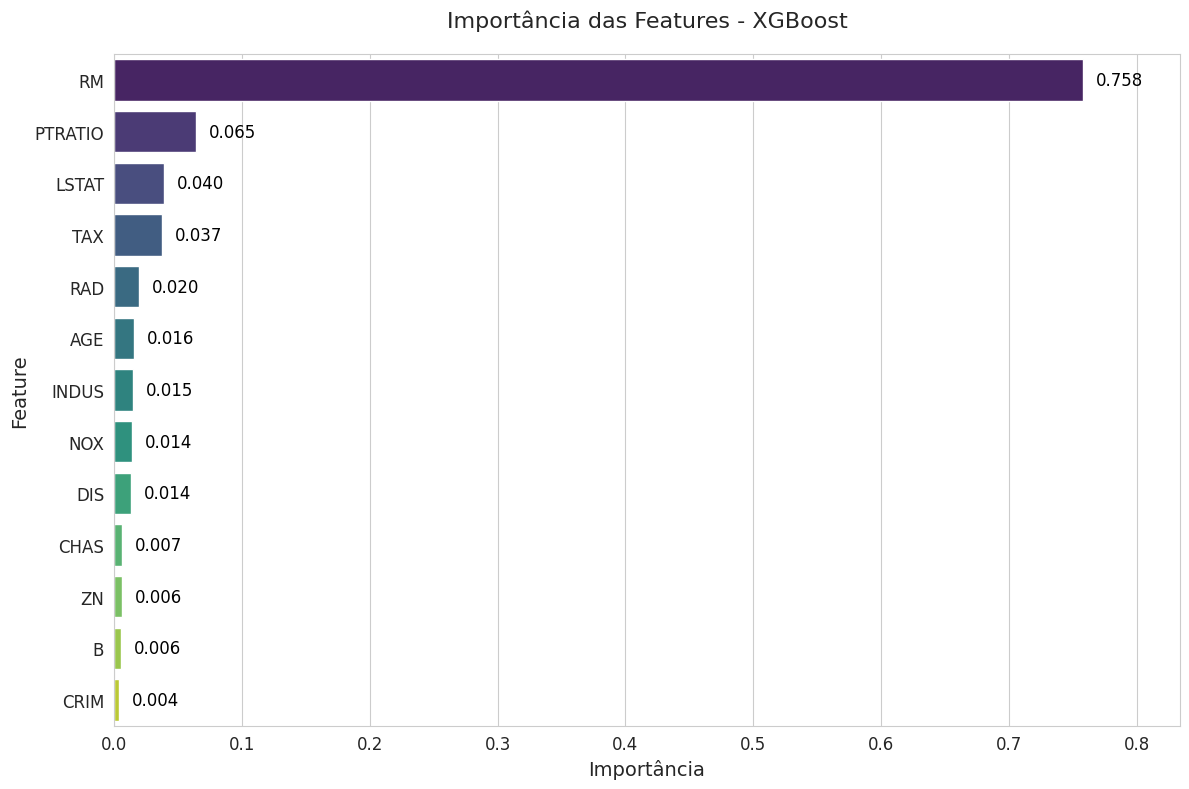

In [13]:
# Função para plotar importância das features com alta definição
def plot_feature_importance(importance, names, model_name):
    # Criar DataFrame com as features e importâncias
    feature_importance = pd.DataFrame({'Feature': names, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    # Configurações do gráfico
    plt.figure(figsize=(12, 8))  # Aumentar o tamanho da figura
    sns.set_style("whitegrid")  # Usar um estilo limpo e moderno
    ax = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")

    # Adicionar valores numéricos nas barras
    for i, v in enumerate(feature_importance['Importance']):
        ax.text(v + 0.01, i, f'{v:.3f}', color='black', va='center', fontsize=12)  # Formatar valores com 3 casas decimais

    # Melhorar a aparência do gráfico
    plt.title(f'Importância das Features - {model_name}', fontsize=16, pad=20)
    plt.xlabel('Importância', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, feature_importance['Importance'].max() * 1.1)  # Ajustar limite do eixo x
    plt.tight_layout()  # Melhorar o espaçamento
    plt.show()


print("Importâncias - Random Forest:", rf.feature_importances_)

print("Importâncias - XGBoost:", xgb.feature_importances_)

# Importância das features no Random Forest
print("Importância das Features - Random Forest")
plot_feature_importance(rf.feature_importances_, X.columns, 'Random Forest')

# Importância das features no XGBoost
print("Importância das Features - XGBoost")
plot_feature_importance(xgb.feature_importances_, X.columns, 'XGBoost')